### Importing Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import  matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
train = pd.read_csv("train1.csv")
test = pd.read_csv("test1.csv")


In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

## Data preprocessing

### checking duplicates

In [7]:
print("Number of duplicates in train :",sum(train.duplicated()))
print("Number of duplicates in train :",sum(test.duplicated()))

Number of duplicates in train : 0
Number of duplicates in train : 0


### Checking missing values

In [8]:
train.isna().values.sum()
test.isna().values.sum()

0

### Checking for class imbalance


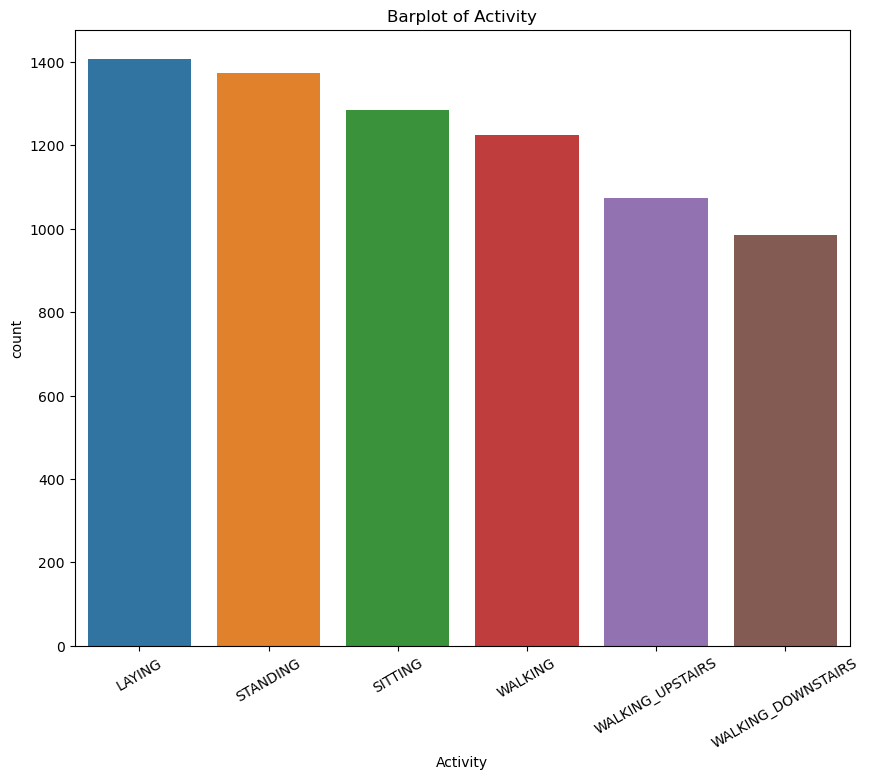

In [9]:
plt.figure(figsize=(10, 8))
plt.title('Barplot of Activity')
sns.countplot(data=train, x='Activity', order=train['Activity'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

# Exploratory Data Analysis


### What features are there?

In [10]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [11]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient = "index").rename(columns={0:'count'}).sort_values('count',ascending = False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


### Analysis tBodyAccMag-mean feature

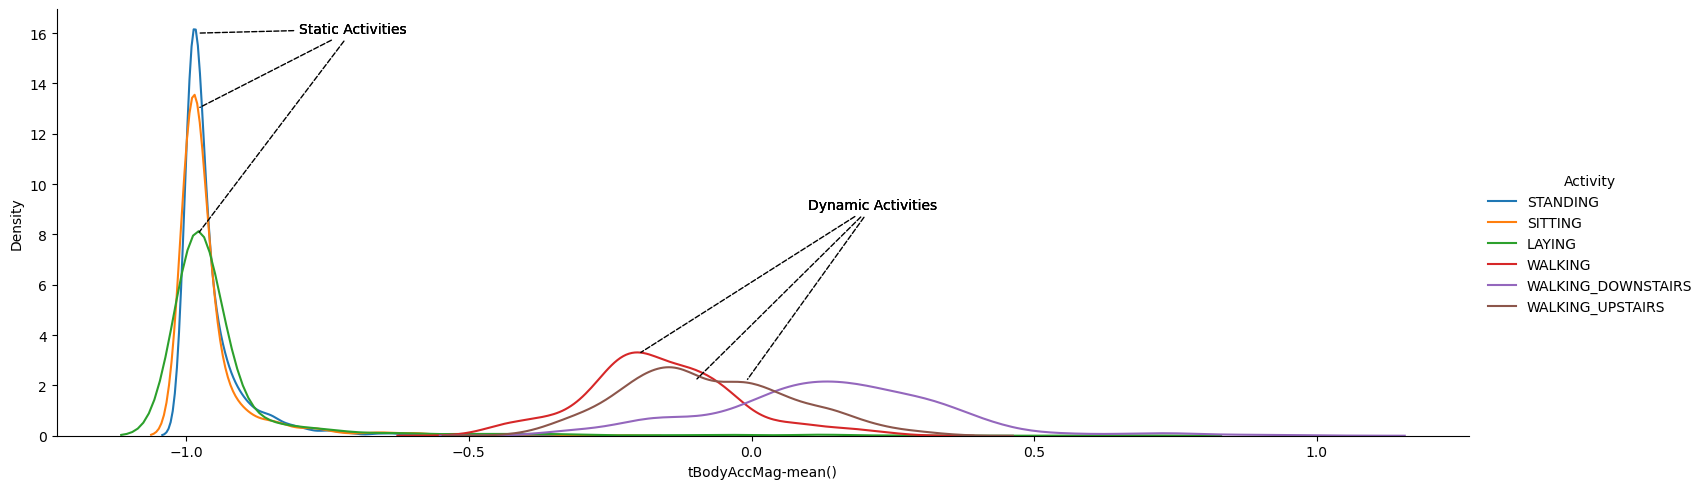

In [31]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5, aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()',hist = False).add_legend()

plt.annotate("Static Activities", xy = (-0.98,8), xytext = (-0.8,16), arrowprops = {'arrowstyle':'-','ls': 'dashed'})
plt.annotate("Static Activities", xy = (-0.98,13), xytext = (-0.8,16), arrowprops = {'arrowstyle':'-','ls': 'dashed'})
plt.annotate("Static Activities", xy = (-0.98,16), xytext = (-0.8,16), arrowprops = {'arrowstyle':'-','ls': 'dashed'})

plt.annotate("Dynamic Activities", xy = (-0.2,3.25), xytext = (0.1,9), arrowprops = {'arrowstyle':'-','ls': 'dashed'})
plt.annotate("Dynamic Activities", xy = (-0.1,2.18), xytext = (0.1,9), arrowprops = {'arrowstyle':'-','ls': 'dashed'})
plt.annotate("Dynamic Activities", xy = (-0.01,2.15), xytext = (0.1,9), arrowprops = {'arrowstyle':'-','ls': 'dashed'})

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

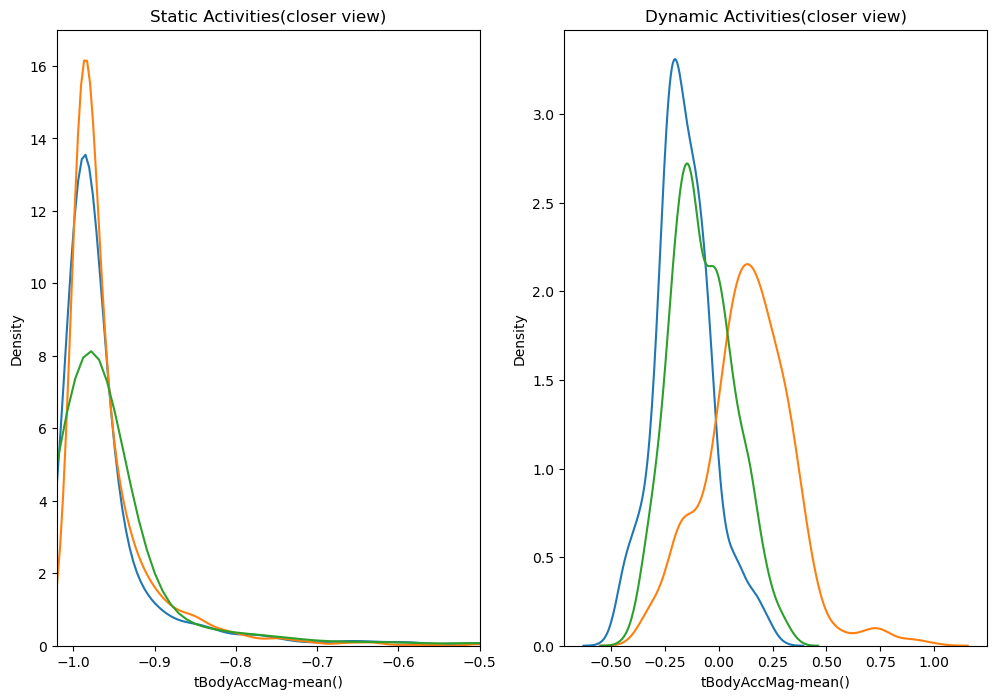

In [36]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=='SITTING']['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=='STANDING']['tBodyAccMag-mean()'],hist = False, label = 'Standing')
sns.distplot(train[train["Activity"]=='LAYING']['tBodyAccMag-mean()'],hist = False, label = 'laying')
plt.axis([-1.02,-0.5,0,17])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=='WALKING']['tBodyAccMag-mean()'],hist = False, label = 'Walkinb')
sns.distplot(train[train["Activity"]=='WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'],hist = False, label = 'Walking_downstairs')
sns.distplot(train[train["Activity"]=='WALKING_UPSTAIRS']['tBodyAccMag-mean()'],hist = False, label = 'Walking_upstairs')
plt.show

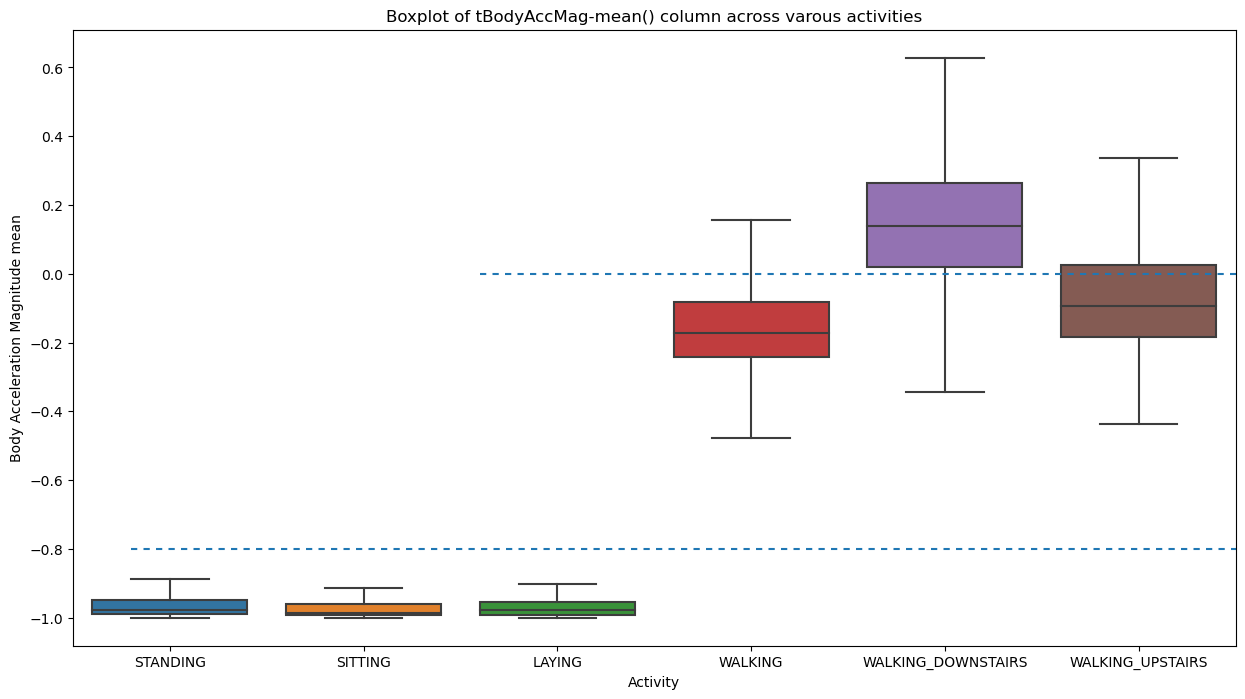

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x = 'Activity',y = 'tBodyAccMag-mean()',data = train,showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across varous activities")
plt.axhline(y = -0.8,xmin = 0.05, dashes = (3,3))
plt.axhline(y = 0.0,xmin = 0.35, dashes = (3,3))
plt.show()


### Analysing Angle between Y-axis and gravityMeanFeature

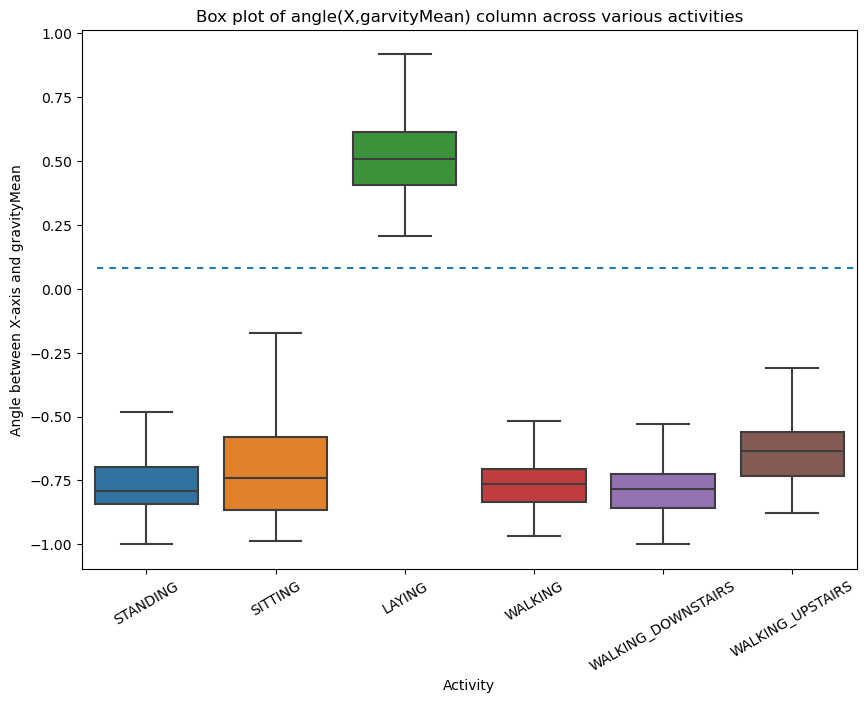

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y = 'angle(X,gravityMean)',data = train,showfliers = False)
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,garvityMean) column across various activities')
plt.xticks(rotation = 30)
plt.axhline(y = 0.08,xmin = 0.02, dashes=(3,3))
plt.show()

### Analysing Angle between Y-axis and gravityMeanFeature

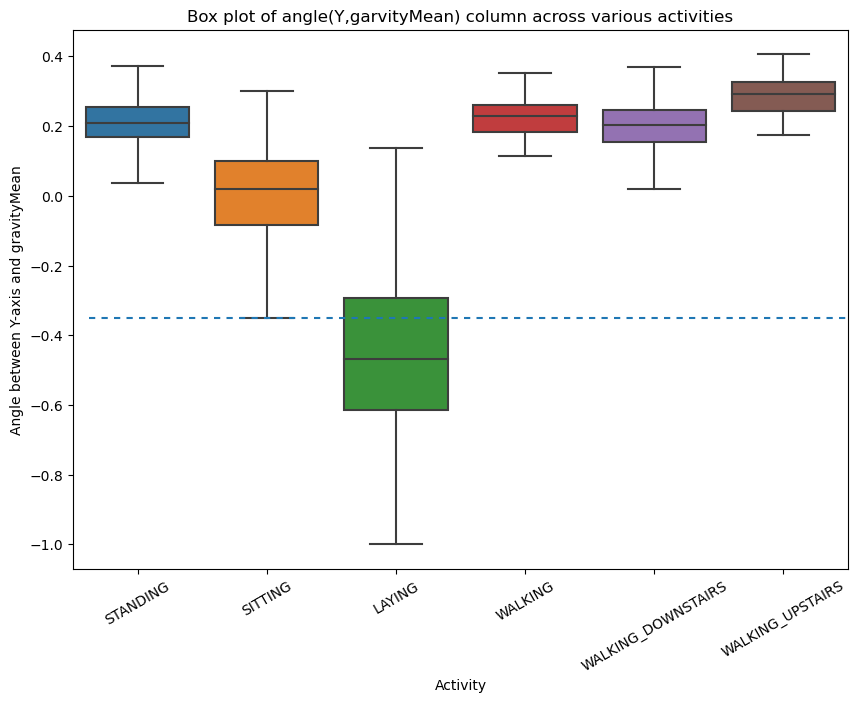

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity',y = 'angle(Y,gravityMean)',data = train,showfliers = False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,garvityMean) column across various activities')
plt.xticks(rotation = 30)
plt.axhline(y = -0.35,xmin = 0.02, dashes=(3,3))
plt.show()

### Visualizing data using PCA

In [47]:
x_pca = train.drop(['subject','Activity'],axis = 1)
pca  = PCA(n_components=2,random_state=0).fit_transform(x_pca)

In [48]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

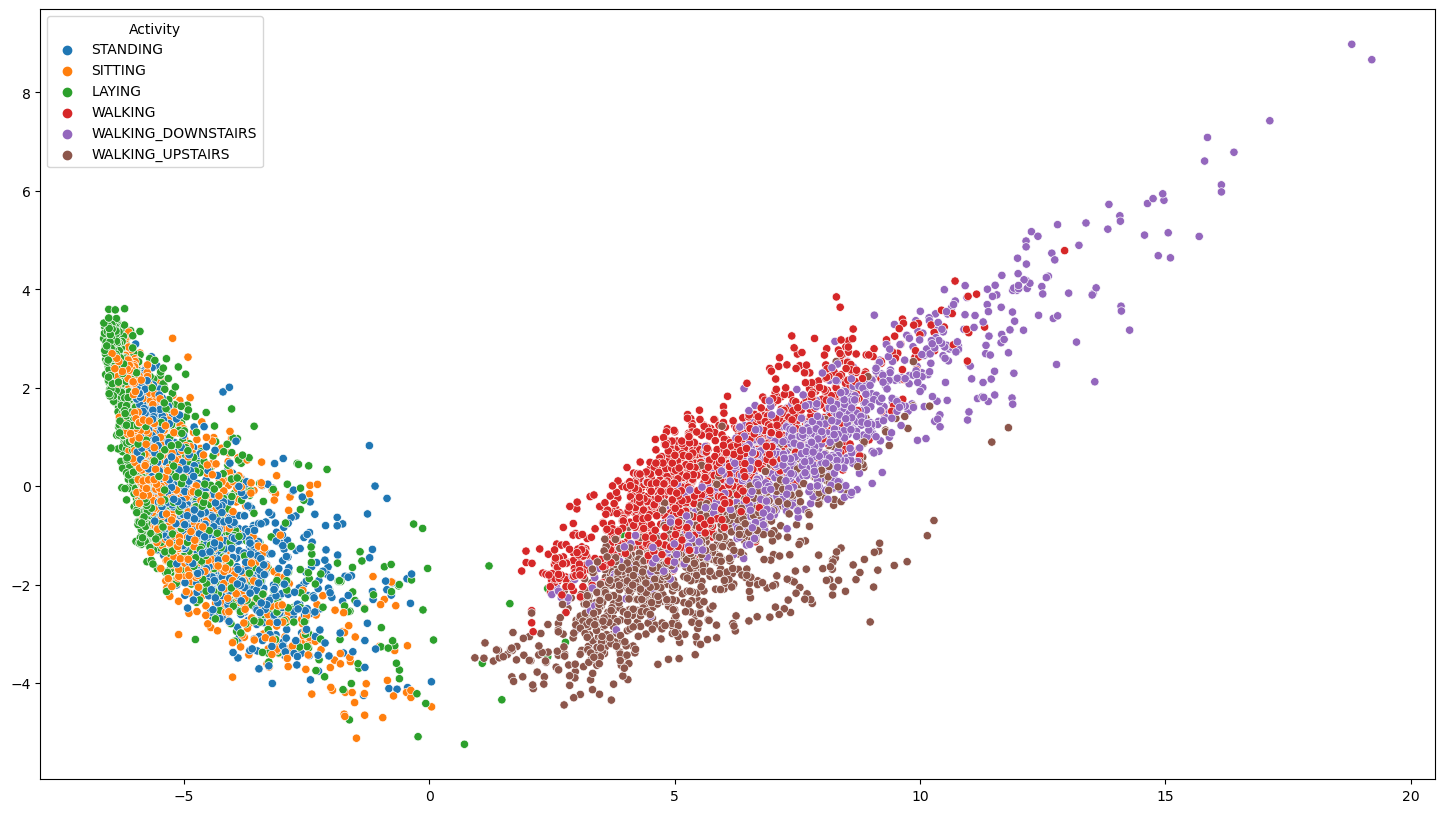

In [50]:
plt.figure(figsize=(18,10))
sns.scatterplot(x=pca[:,0],y = pca[:,1],hue = train['Activity'])
plt.show()

### Visualizing data using t-SNE


In [52]:
x_tsne = train.drop(['subject','Activity'],axis = 1)
tsne  = TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x_tsne)

In [53]:
tsne

array([[ 62.519726 , -39.882767 ],
       [ 12.757289 , -39.120724 ],
       [ 15.998378 , -37.06981  ],
       ...,
       [ 62.136868 ,  13.779504 ],
       [ 61.87794  ,  13.7746315],
       [ 61.130905 ,  14.289187 ]], dtype=float32)

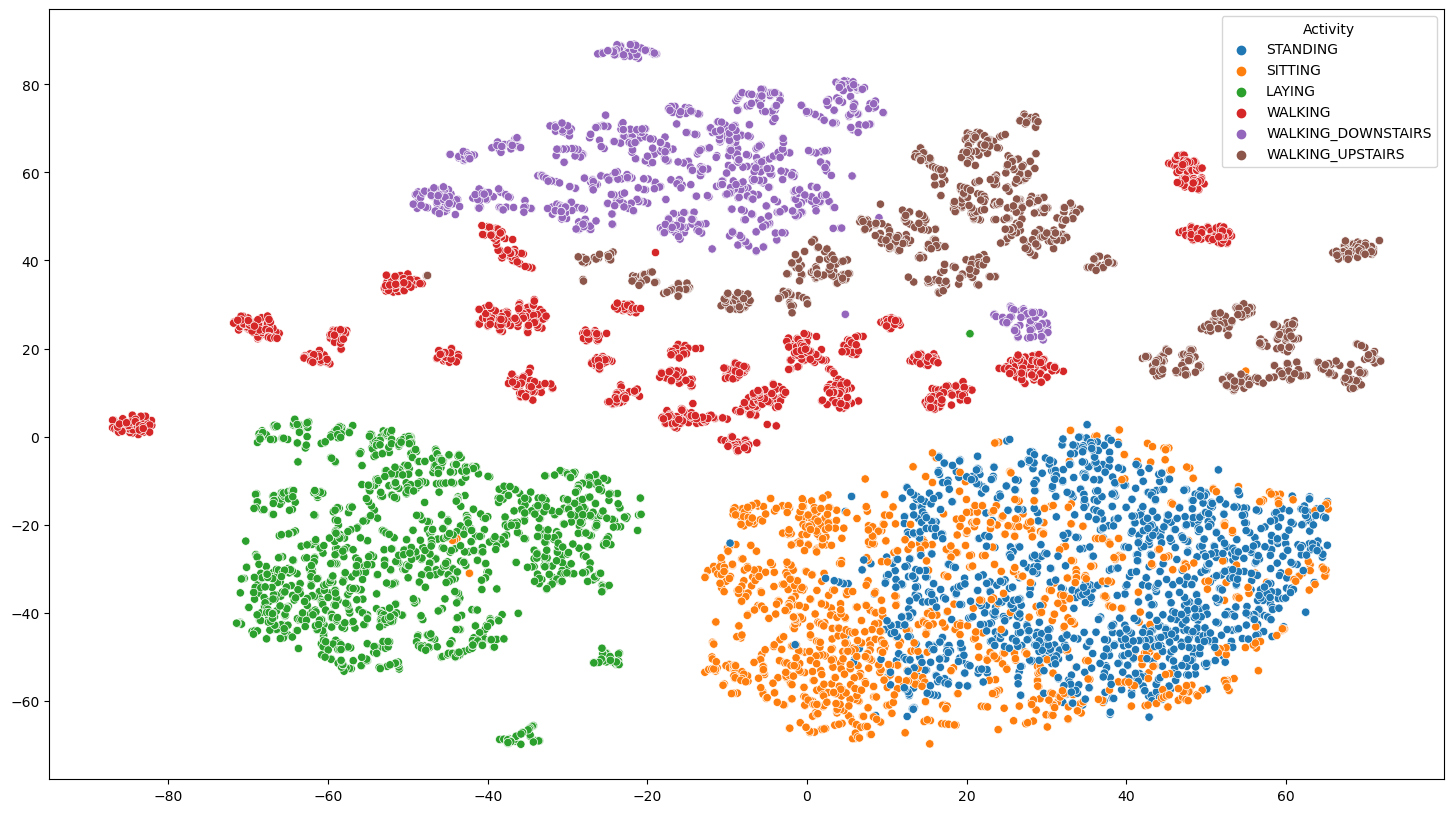

In [54]:
plt.figure(figsize=(18,10))
sns.scatterplot(x=tsne[:,0],y = tsne[:,1],hue = train['Activity'])
plt.show()

## ML Models



### Spliiting training and testing data

In [64]:
X_train = train.drop(['subject','Activity'],axis = 1)
Y_train = train.Activity

X_test = test.drop(['subject','Activity'],axis = 1)
Y_test = test.Activity

In [65]:
X_train.shape,X_test.shape

((7352, 561), (999, 561))

### Logistic regression model with Hyperparameter tuning and cross validation 

In [66]:
parameters = {'max_iter':[100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier,param_distributions=parameters,cv=5,random_state=42)
lr_classifier_rs.fit(X_train,Y_train)
y_pred_lr = lr_classifier_rs.predict(X_test)

In [68]:
lr_accuracy = accuracy_score(y_true = Y_test,y_pred = y_pred_lr)
lr_accuracy

0.954954954954955

In [78]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=labels,
        yticklabels=labels,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.xticks(rotation=90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')

In [79]:
cm = confusion_matrix(Y_test.values,y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

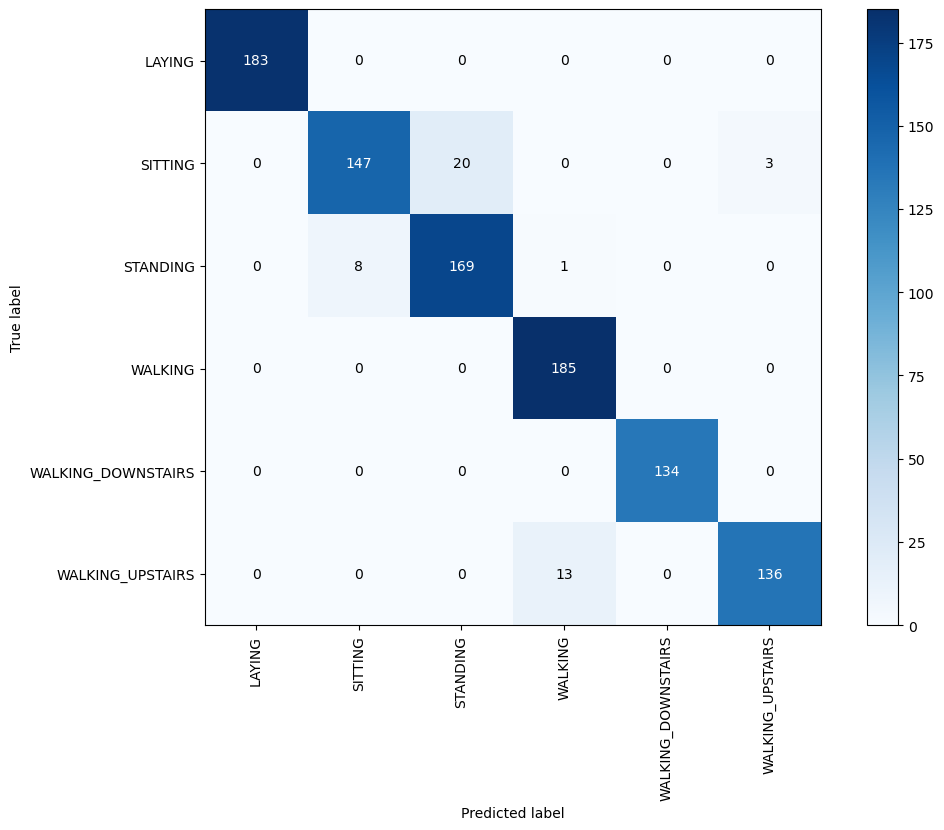

In [80]:
plot_confusion_matrix(cm,np.unique(y_pred_lr))

In [83]:
# function to get best random search attributes
def get_bestrandomsearch_results(model):
    print("Best estimator:",model.best_estimator_)
    print("Best set of parameters :",model.best_params_)

In [84]:
get_bestrandomsearch_results(lr_classifier_rs)

Best estimator: LogisticRegression(max_iter=500)
Best set of parameters : {'max_iter': 500}


### SVM Model with Hyperparameter tuning and Cross Validation

In [85]:
parameters = {
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,50]
}

svm_rs = RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=2)
svm_rs.fit(X_train,Y_train)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=2)

In [88]:
y_pred = svm_rs.predict(X_test)

In [89]:
kernel_svm_accuracy = accuracy_score(y_true = Y_test,y_pred= y_pred)
kernel_svm_accuracy

0.965965965965966

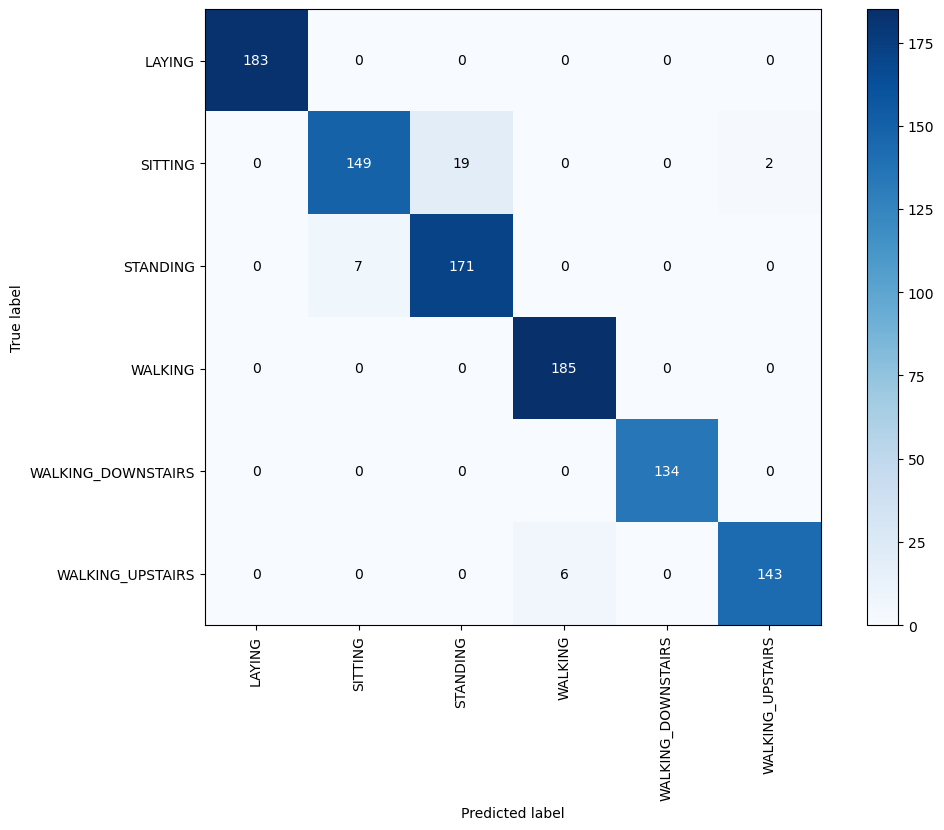

In [90]:
cm = confusion_matrix(Y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))


In [91]:
get_bestrandomsearch_results(svm_rs)

Best estimator: SVC(C=50)
Best set of parameters : {'kernel': 'rbf', 'C': 50}


### Decesion tree model with Hyperparameter tuning and cross validation

In [92]:
parameters = {'max_depth': np.arange(2,10,2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state=2)
dt_classifier_rs.fit(X_train,Y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=2)

In [93]:
y_pred = dt_classifier_rs.predict(X_test)

In [94]:
dt_accuracy = accuracy_score(y_true = Y_test,y_pred = y_pred)
dt_accuracy

0.8528528528528528

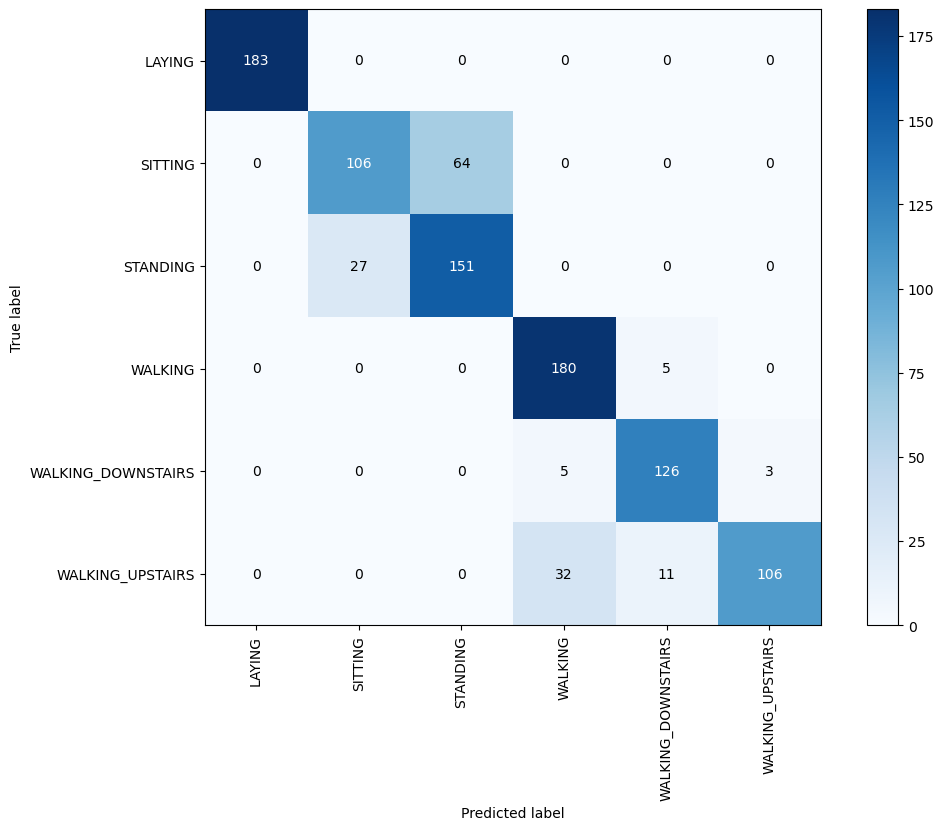

In [95]:
cm = confusion_matrix(Y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [96]:
get_bestrandomsearch_results(dt_classifier_rs)

Best estimator: DecisionTreeClassifier(max_depth=8)
Best set of parameters : {'max_depth': 8}


### Random forest model with Hyperparameter tuning and cross validation


In [97]:
parameters = {
    'n_estimators':np.arange(20,101,10),
    'max_depth': np.arange(2,17,2)
}

rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier,param_distributions=parameters,random_state=24)
rf_classifier_rs.fit(X_train,Y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=24)

In [98]:
y_pred = rf_classifier_rs.predict(X_test)

In [100]:
rf_accuracy = accuracy_score(y_true=Y_test,y_pred = y_pred)
rf_accuracy

0.913913913913914

In [101]:
get_bestrandomsearch_results(rf_classifier_rs)

Best estimator: RandomForestClassifier(max_depth=8, n_estimators=70)
Best set of parameters : {'n_estimators': 70, 'max_depth': 8}


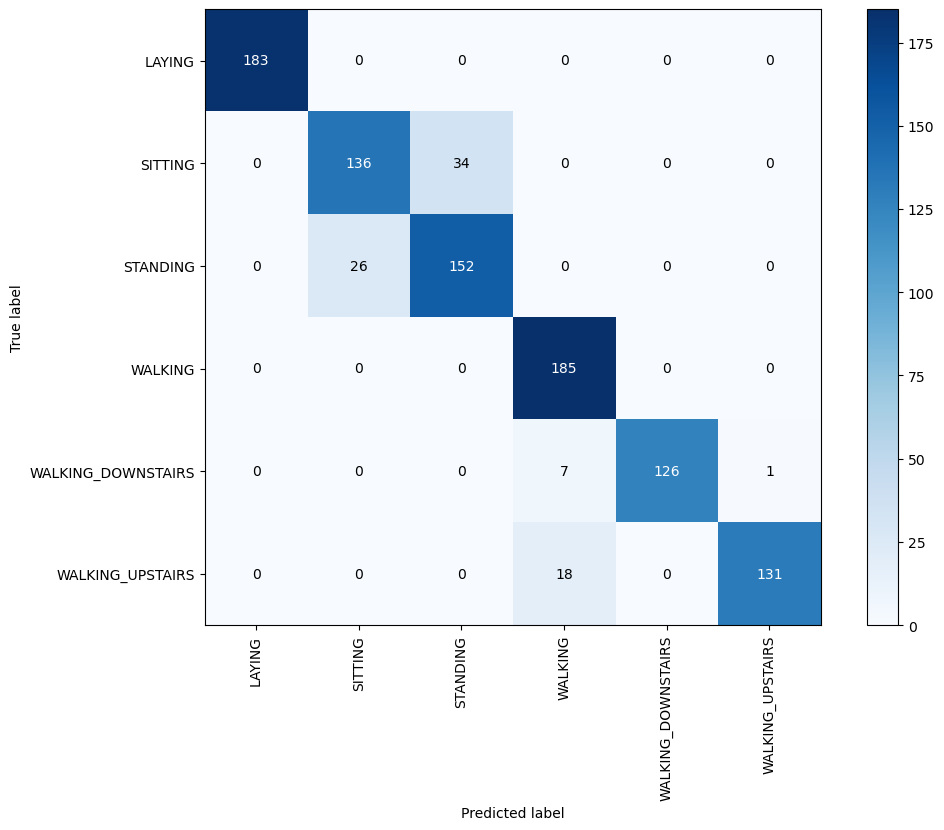

In [102]:
cm = confusion_matrix(Y_test.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))